## 소비자물가지수 consumer price index

비교시점의 물가지수는 기준시점을 100으로 할 때 비교시점 물가의 높고 낮은 정도를 나타냅니다.
이때, 지수를 100으로 보는 해를 지수기준연도라고 합니다.
따라서 물가지수의 숫자 그 자체는 의미가 없으며, 지수기준연도에 따라 변경될 수 있습니다.

현재 지수기준연도는 2015년이며, 5년마다 지수개편을 통하여 변경되고 있습니다.

출처 : [물가지수|소비자물가지수](http://kostat.go.kr/incomeNcpi/cpi/cpi_td/1/2/index.static)


* 소비자 물가지수(消費者 物價指數, Consumer Price Index, CPI)는 가정이 소비하기 위해 구입하는 재화와 용역의 평균 가격을 측정한 지수다. 국가의 통계 기관에서 계산한 물가지수(price index)의 일종이다. 소비자물가지수의 변동률로 인플레이션을 측정할 수 있다. 소비자물가지수를 이용해 급여(wage), 봉급(salary), 연금, 물가를 연동시켜 인플레이션의 영향을 조정할 수 있다. 소비자물가지수는 인구 조사, 등과 함께 국가의 기본적인 경제 통계이다.

* 이론적으로는 생계비 지수와 동일하게 간주된다. 소비자가 구입하는 소비재나 용역 등 일정 범위의 세대의 소비생활에서 나타나는 물가 수준의 변동을 측정하기 위하여 쓰이는 물가지수이다.

* 데이터 출처 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1J17112&vw_cd=MT_GTITLE01&list_id=105&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01


In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv("data/consumer_price_index.csv", encoding="cp949")

In [3]:
df = raw.melt(id_vars="시도별")

In [4]:
df["시도별"].unique()

array(['전국'], dtype=object)

In [5]:
del df["시도별"]

In [6]:
df.columns = ["기간", "소비자물가지수"]
df.head()

,기간,소비자물가지수
0,1965. 01,2.628
1,1965. 02,2.686
2,1965. 03,2.691
3,1965. 04,2.733
4,1965. 05,2.788


In [7]:
df["연"] = df["기간"].str.split(". ", expand=True)[0]
df["월"] = df["기간"].str.split(". ", expand=True)[1]

In [8]:
df

,기간,소비자물가지수,연,월
0,1965. 01,2.628,1965,01
1,1965. 02,2.686,1965,02
2,1965. 03,2.691,1965,03
3,1965. 04,2.733,1965,04
4,1965. 05,2.788,1965,05
...,...,...,...,...
661,2020. 02,105.800,2020,02
662,2020. 03,105.540,2020,03
663,2020. 04,104.950,2020,04
664,2020. 05,104.710,2020,05


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})

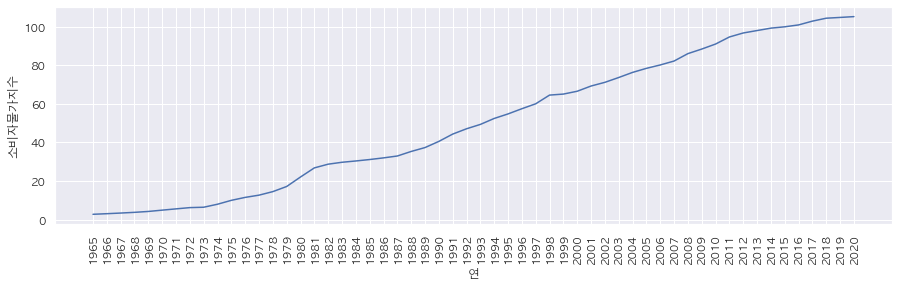

In [10]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.lineplot(data=df, x="연", y="소비자물가지수", ci=None)

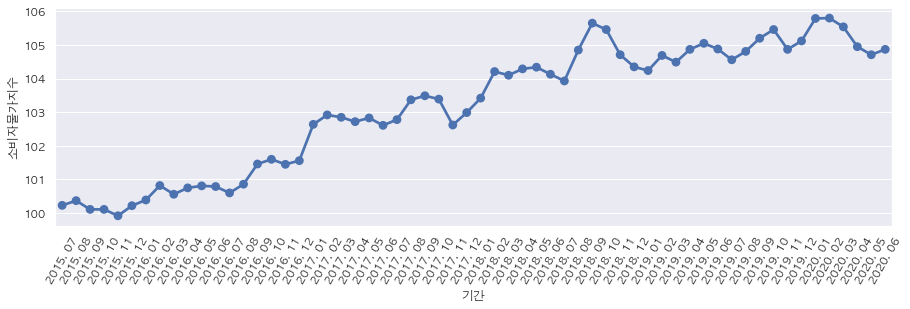

In [11]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df[-60:], x="기간", y="소비자물가지수", ci=None)

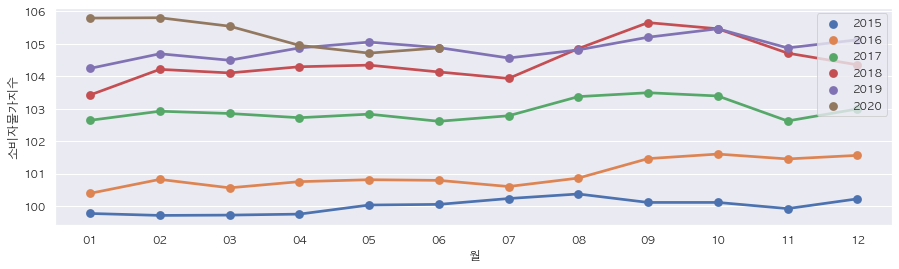

In [12]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df[-66:], x="월", y="소비자물가지수", hue="연", ci=None)
plt.legend(loc=1)

In [13]:
cpi = df[-66:].groupby(["월", "연"])["소비자물가지수"].mean().unstack().fillna(0)
cpi.style.background_gradient()

연,2015,2016,2017,2018,2019,2020
월,,,,,,
01,99.770000,100.390000,102.640000,103.420000,104.240000,105.790000
02,99.710000,100.820000,102.920000,104.210000,104.690000,105.800000
03,99.720000,100.560000,102.850000,104.100000,104.490000,105.540000
04,99.750000,100.750000,102.720000,104.290000,104.870000,104.950000
05,100.030000,100.810000,102.830000,104.340000,105.050000,104.710000
06,100.050000,100.790000,102.610000,104.130000,104.880000,104.870000
07,100.230000,100.600000,102.780000,103.930000,104.560000,0.000000
08,100.370000,100.860000,103.370000,104.850000,104.810000,0.000000
09,100.110000,101.460000,103.490000,105.650000,105.200000,0.000000
